# Import các thư viện


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


# Đọc dữ liệu


In [ ]:
df = pd.read_csv("../Data/hotel_bookings_resort.csv")
df


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent
0,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,0,3,0,0.00,0,0,Europe
1,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,0,4,0,0.00,0,0,Europe
2,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,...,0,0,0,0,0,0,75.00,0,0,Europe
3,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,0,0,0,0,0,0,75.00,0,0,Europe
4,2015-07-01,2015-07-03,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,0,98.00,0,1,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33950,2017-08-31,2017-09-10,Resort Hotel,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,...,1,0,0,0,1,0,89.75,0,0,Europe
33951,2017-08-30,2017-09-10,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,0,0,0,0,0,202.27,0,1,Europe
33952,2017-08-29,2017-09-12,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,0,0,0,0,0,153.57,0,3,Europe
33953,2017-08-31,2017-09-14,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,D,D,No Deposit,...,0,0,0,0,0,0,112.80,0,1,Europe


# chuyển 2 cột date thành kiểu datetime trước rồi tiếp tục làm việc


In [ ]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


Khách nội địa hay khách quốc tế có tỉ lệ hủy đơn cao hơn ?


Vẽ biểu đồ thể hiện tỉ lệ hủy đơn qua các tháng của khách nội địa (Portugal) và khách quốc tế


Tính số đơn hủy qua các tháng của khách nội địa (Portugal) và khách quốc tế


In [ ]:
df["is_domestic"] = df["country"] == "PRT"

df["month_year"] = df["arrival_date"].dt.to_period("M")

df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = df_canceled.groupby(["is_domestic", "month_year"]).size().unstack()

num_canceled_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,NaN,NaN,20.0,16.0,2.0,NaN,NaN,3.0,15.0,51.0,...,114.0,132.0,112.0,152.0,113.0,241.0,265.0,290.0,343.0,362.0
True,280.0,341.0,232.0,135.0,103.0,152.0,87.0,149.0,224.0,214.0,...,88.0,114.0,75.0,136.0,113.0,153.0,133.0,244.0,265.0,277.0


Thay thế các giá trị nan bằng 0


In [ ]:
num_canceled_order = num_canceled_order.fillna(0)

num_canceled_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.0,0.0,20.0,16.0,2.0,0.0,0.0,3.0,15.0,51.0,...,114.0,132.0,112.0,152.0,113.0,241.0,265.0,290.0,343.0,362.0
True,280.0,341.0,232.0,135.0,103.0,152.0,87.0,149.0,224.0,214.0,...,88.0,114.0,75.0,136.0,113.0,153.0,133.0,244.0,265.0,277.0


Tính số đơn qua các tháng của khách nội địa (Portugal) và khách quốc tế


In [ ]:
num_order = df.groupby(["is_domestic", "month_year"]).size().unstack()

num_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,574,492,731,673,408,407,357,477,687,746,...,745,634,620,753,745,1041,1129,1008,1078,1051
True,705,852,436,468,457,554,461,668,776,611,...,440,520,523,593,448,430,376,520,592,662


Kiểm tra có giá trị nan không


In [ ]:
null_values_by_col = num_order.isnull().sum()

any(null_values_by_col > 0)


False

Tỉ lệ hủy đơn qua các tháng của khách nội địa (Portugal) và khách quốc tế


In [ ]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.00,0.00,2.74,2.38,0.49,0.00,0.00,0.63,2.18,6.84,...,15.3,20.82,18.06,20.19,15.17,23.15,23.47,28.77,31.82,34.44
True,39.72,40.02,53.21,28.85,22.54,27.44,18.87,22.31,28.87,35.02,...,20.0,21.92,14.34,22.93,25.22,35.58,35.37,46.92,44.76,41.84


Chuyển vị lại bảng


In [ ]:
cancel_ratio = cancel_ratio.T

cancel_ratio


is_domestic,False,True
month_year,,
2015-07,0.00,39.72
2015-08,0.00,40.02
2015-09,2.74,53.21
2015-10,2.38,28.85
2015-11,0.49,22.54
2015-12,0.00,27.44
2016-01,0.00,18.87
2016-02,0.63,22.31
2016-03,2.18,28.87


Đổi tên cột


In [ ]:
cancel_ratio = cancel_ratio.rename(columns={False: "international", True: "domestic"})

cancel_ratio.columns


Index(['international', 'domestic'], dtype='object', name='is_domestic')

Vẽ biểu đồ


In [ ]:
cancel_ratio = cancel_ratio.reset_index(names="month_year")

cancel_ratio["month_year_tst"] = cancel_ratio["month_year"].dt.to_timestamp()


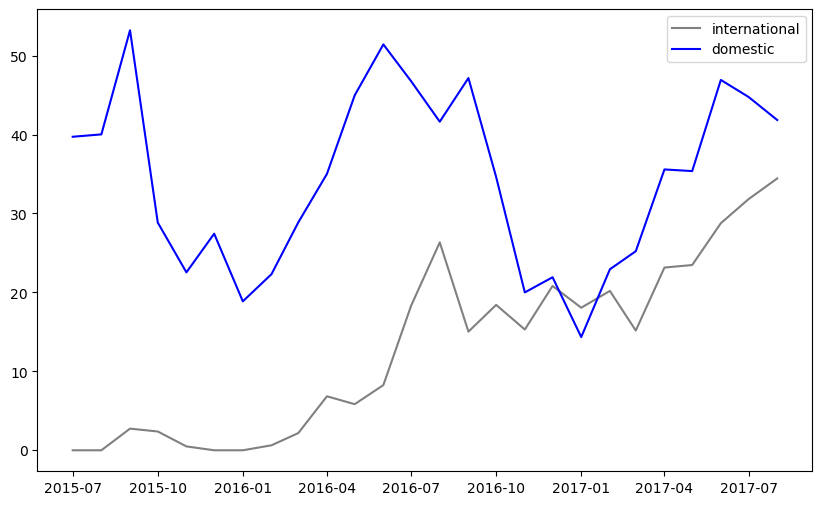

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(
    cancel_ratio["month_year_tst"],
    cancel_ratio["international"],
    label="international",
    color="gray",
)
plt.plot(
    cancel_ratio["month_year_tst"],
    cancel_ratio["domestic"],
    label="domestic",
    color="blue",
)
plt.legend()
plt.show()


Tỉ lệ hủy đơn trong 1 tháng của khách nội địa nhìn chung cao hơn so với khách quốc tế

Vẽ biểu đồ thể hiện tỉ lệ hủy đơn qua các quý của khách nội địa (Portugal) và khách quốc tế


Tính số đơn hủy qua các quý của khách nội địa (Portugal) và khách quốc tế


In [ ]:
df["quarter_year"] = df["arrival_date"].dt.to_period("Q")

df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = (
    df_canceled.groupby(["is_domestic", "quarter_year"]).size().unstack()
)

num_canceled_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,20,18,18,167,513,456,377,796,705
True,853,390,460,695,754,356,324,530,542


Tính số đơn qua các qúy của khách nội địa (Portugal) và khách quốc tế


In [ ]:
num_order = df.groupby(["is_domestic", "quarter_year"]).size().unstack()

num_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,1797,1488,1521,2411,2566,2519,2118,3178,2129
True,1993,1479,1905,1615,1687,1405,1564,1326,1254


Tỉ lệ hủy đơn qua các quý của khách nội địa (Portugal) và khách quốc tế


In [ ]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,1.11,1.21,1.18,6.93,19.99,18.10,17.80,25.05,33.11
True,42.80,26.37,24.15,43.03,44.69,25.34,20.72,39.97,43.22


Chuyển vị lại bảng


In [ ]:
cancel_ratio = cancel_ratio.T

cancel_ratio


is_domestic,False,True
quarter_year,,
2015Q3,1.11,42.80
2015Q4,1.21,26.37
2016Q1,1.18,24.15
2016Q2,6.93,43.03
2016Q3,19.99,44.69
2016Q4,18.10,25.34
2017Q1,17.80,20.72
2017Q2,25.05,39.97
2017Q3,33.11,43.22


Đổi tên cột


In [ ]:
cancel_ratio = cancel_ratio.rename(columns={False: "international", True: "domestic"})

cancel_ratio.columns


Index(['international', 'domestic'], dtype='object', name='is_domestic')

Vẽ biểu đồ


In [ ]:
cancel_ratio = cancel_ratio.reset_index(names="quarter_year")

cancel_ratio["quarter_year_tst"] = cancel_ratio["quarter_year"].dt.to_timestamp()


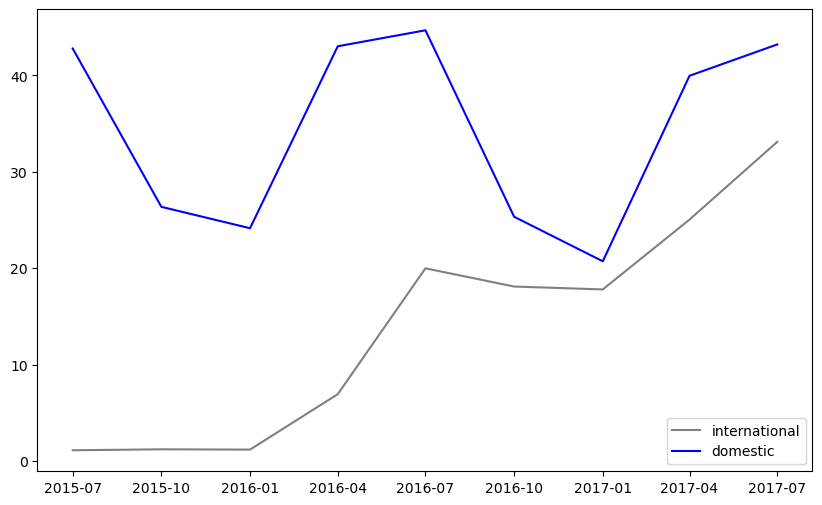

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["international"],
    label="international",
    color="gray",
)
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["domestic"],
    label="domestic",
    color="blue",
)
plt.legend()
plt.show()


Tỉ lệ hủy đơn qua các quý của khách nội địa nhìn chung cao hơn so với khách quốc tế


Thực hiện kiểm định như sau:

- H0: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và quốc tế là như nhau
- H1: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế
- alpha = 0.05

Lí do chọn 1 tuần mà không phải 1 tháng, quý: để khảo sát ở mức độ thời gian nhỏ hơn khi đó có nhiều mẫu để đánh giá hơn


Tính số đơn hủy qua các tuần của khách nội địa (Portugal) và khách quốc tế


In [ ]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = df_canceled.groupby(["is_domestic", "week_year"]).size().unstack()

num_canceled_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,74.0,63.0,72.0,69.0,91.0,97.0,72.0,92.0,73.0,45.0
True,48.0,47.0,65.0,67.0,88.0,70.0,93.0,60.0,76.0,72.0,...,66.0,49.0,62.0,64.0,52.0,77.0,52.0,77.0,57.0,26.0


Lấp các giá trị nan bằng 0


In [ ]:
num_canceled_order = num_canceled_order.fillna(0)


Tính số đơn qua các tuần của khách nội địa (Portugal) và khách quốc tế


In [ ]:
num_order = df.groupby(["is_domestic", "week_year"]).size().unstack()

num_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,104,121,119,123,135,103,118,104,121,161,...,218,236,256,229,252,252,231,238,222,135
True,114,142,174,164,197,185,215,171,178,152,...,149,102,150,122,120,170,128,187,148,64


Kiểm tra có giá trị nan không


In [ ]:
null_values = num_order.applymap(lambda x: pd.isnull(x)).stack()
null_values = null_values[null_values]

null_values


Series([], dtype: bool)

Tỉ lệ hủy đơn qua các tuần của khách nội địa (Portugal) và khách quốc tế


In [ ]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4.97,...,33.94,26.69,28.12,30.13,36.11,38.49,31.17,38.66,32.88,33.33
True,42.11,33.1,37.36,40.85,44.67,37.84,43.26,35.09,42.7,47.37,...,44.30,48.04,41.33,52.46,43.33,45.29,40.62,41.18,38.51,40.62


chuyển vị lại bảng và đặt tên lại các cột


In [ ]:
cancel_ratio = cancel_ratio.T

new_columns = {False: "international", True: "domestic"}

cancel_ratio = cancel_ratio.rename(columns=new_columns)

cancel_ratio


is_domestic,international,domestic
week_year,,
2015-06-29/2015-07-05,0.00,42.11
2015-07-06/2015-07-12,0.00,33.10
2015-07-13/2015-07-19,0.00,37.36
2015-07-20/2015-07-26,0.00,40.85
2015-07-27/2015-08-02,0.00,44.67
...,...,...
2017-07-31/2017-08-06,38.49,45.29
2017-08-07/2017-08-13,31.17,40.62
2017-08-14/2017-08-20,38.66,41.18


Tính trung bình tỉ lệ hủy đơn trong 1 tuần


In [ ]:
mean_by_origin = cancel_ratio.mean()
mean_by_origin


is_domestic
international    12.945439
domestic         34.517807
dtype: float64

Tạo hàm tính thống kê kiểm định


In [ ]:
def get_statistic(sample_a, sample_b):
    return np.mean(sample_a) - np.mean(sample_b)


Thực hiện kiểm định bằng permutation test


In [ ]:
p_value = stats.permutation_test(
    (cancel_ratio["domestic"], cancel_ratio["international"]),
    statistic=get_statistic,
    n_resamples=1000000,
    alternative="greater",
).pvalue

p_value


9.99999000001e-07

Giá trị p_value < 0.05 nên có cơ sở khẳng định trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế

Từ hai biểu đồ theo tháng, quý và kết quả kiểm định, có thể khẳng định rằng khách nội địa có xu hướng hủy đơn nhiều hơn so với khách quốc tế

Ý nghĩa: Cần cải thiện chất lượng dịch vụ để đáp ứng với yêu cầu của khách nội địa tốt hơn


Loại bữa ăn được khách hàng ưa chuộng nhất ?


Vẽ biểu đồ thể hiện tỉ lệ phần trăm số đơn qua các tháng ứng với từng loại bữa ăn


Các giá trị trong cột meal


In [ ]:
df["meal"].unique()


array(['BB', 'FB', 'HB', 'no_meal'], dtype=object)

Chỉ xem xét các bữa ăn nên không xét đến giá trị no_meal


In [ ]:
df_meal = df[df["meal"] != "no_meal"]


Số đơn qua các tháng ứng với từng loại bữa ăn


In [ ]:
num_order = df_meal.groupby(["meal", "month_year"]).size().unstack()

num_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
meal,,,,,,,,,,,,,,,,,,,,,
BB,941,925,866,968,742,774,744,955,1244,1079,...,969,872,957,1119,968,1117,1198,1171,1181,1120
FB,35,33,12,14,13,15,2,24,12,18,...,1,10,3,3,2,6,7,7,14,39
HB,303,385,285,154,99,130,70,134,177,233,...,197,208,115,184,187,300,290,337,452,530


Kiểm tra có giá trị nan không


In [ ]:
null_values = num_order[num_order.applymap(lambda x: pd.isnull(x))].stack()

null_values = null_values[null_values]

null_values


Series([], dtype: float64)

tỉ lệ phần trăm số đơn qua các tháng ứng với từng loại bữa ăn


In [ ]:
percent_by_meal = num_order / num_order.sum() * 100

percent_by_meal = percent_by_meal.round(2)

percent_by_meal


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
meal,,,,,,,,,,,,,,,,,,,,,
BB,73.57,68.88,74.46,85.21,86.89,84.22,91.18,85.80,86.81,81.13,...,83.03,80.00,89.02,85.68,83.66,78.50,80.13,77.29,71.71,66.31
FB,2.74,2.46,1.03,1.23,1.52,1.63,0.25,2.16,0.84,1.35,...,0.09,0.92,0.28,0.23,0.17,0.42,0.47,0.46,0.85,2.31
HB,23.69,28.67,24.51,13.56,11.59,14.15,8.58,12.04,12.35,17.52,...,16.88,19.08,10.70,14.09,16.16,21.08,19.40,22.24,27.44,31.38


Vẽ

- biểu đồ thể hiện tỉ lệ phần trăm số đơn qua các tháng ứng với từng loại bữa ăn
- biểu đồ thể hiện tỉ lệ giữa BB/FB và BB/HB qua các tháng


In [ ]:
percent_by_meal = percent_by_meal.T.reset_index(names="time")

percent_by_meal["time"] = percent_by_meal["time"].dt.to_timestamp()


In [ ]:
percent_by_meal["BB/FB"] = percent_by_meal["BB"] / percent_by_meal["FB"]
percent_by_meal["BB/FB"] = percent_by_meal["BB/FB"].round(2)

percent_by_meal["BB/HB"] = percent_by_meal["BB"] / percent_by_meal["HB"]
percent_by_meal["BB/HB"] = percent_by_meal["BB/HB"].round(2)


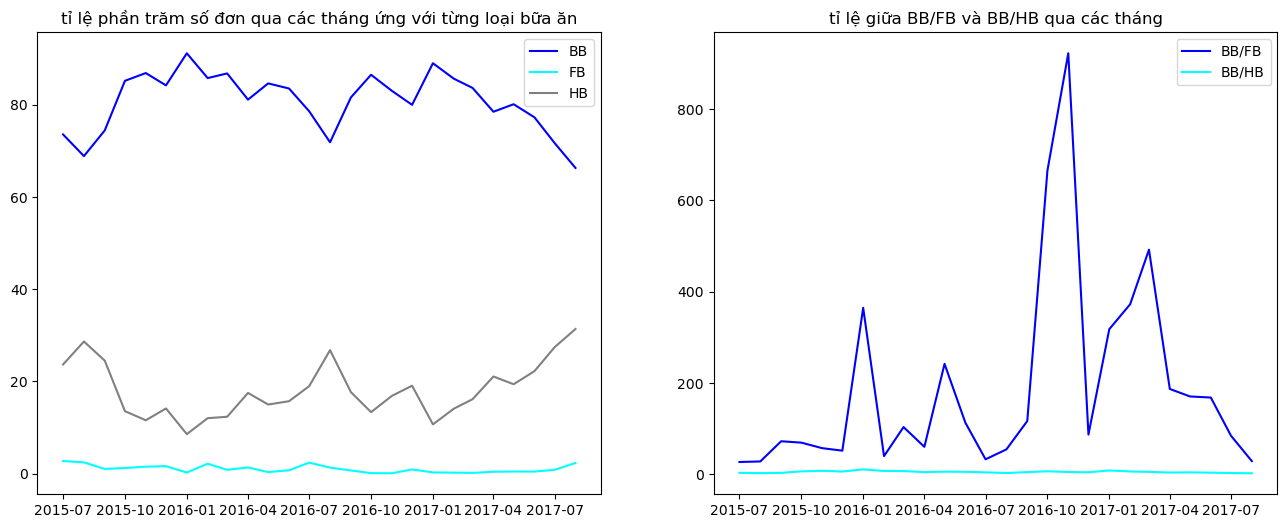

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# biểu đồ thể hiện tỉ lệ phần trăm số đơn qua các tháng ứng với từng loại bữa ăn
ax = axes[0]

ax.plot(percent_by_meal["time"], percent_by_meal["BB"], label="BB", color="blue")
ax.plot(percent_by_meal["time"], percent_by_meal["FB"], label="FB", color="cyan")
ax.plot(percent_by_meal["time"], percent_by_meal["HB"], label="HB", color="gray")
ax.set_title("tỉ lệ phần trăm số đơn qua các tháng ứng với từng loại bữa ăn")

ax.legend()

# biểu đồ thể hiện tỉ lệ giữa BB/FB và BB/HB qua các tháng
ax = axes[1]

ax.plot(percent_by_meal["time"], percent_by_meal["BB/FB"], label="BB/FB", color="blue")
ax.plot(percent_by_meal["time"], percent_by_meal["BB/HB"], label="BB/HB", color="cyan")
ax.set_title("tỉ lệ giữa BB/FB và BB/HB qua các tháng")

ax.legend()


plt.show()


Tỉ lệ số đơn đặt loại bữa ăn Bed & Breakfast cao nhất

Tỉ lệ số đơn đặt loại bữa ăn Full board ít nhất

Tỉ lệ Bed & Breakfast/Full board biến động mạnh theo thời gian

Tỉ lệ Bed & Breakfast/Half board ổn định theo thời gian

Ý nghĩa: Loại bữa ăn được khách hàng ưa chuộng nhất là loại Bed & Breakfast, tuy nhiên để đạt lợi nhuận cao thì nên cân bằng giữa 3 loại bữa ăn do đó cần cải thiện chất lượng của các loại bữa ăn khác đặc biệt là bữa ăn Full board


Thời điểm nào khách hàng ưa đến nhất ?


Vẽ heat map thể hiện số đơn đặt hàng theo từng ngày trong từng tháng của biến arrival_date

Vẽ heat map thể hiện tỉ lệ số đơn đặt hàng bị hủy theo từng ngày trong từng tháng của biến arrival_date


In [ ]:
df["day"] = df["arrival_date"].dt.day
df["month"] = df["arrival_date"].dt.month

df_canceled = df[df["is_canceled"] == 1]

num_order_by_day_and_month = df.groupby(["month", "day"]).size().unstack()

num_canceled_order_by_day_and_month = (
    df_canceled.groupby(["month", "day"]).size().unstack()
)

percent_canceled_order_by_day_and_month = (
    num_canceled_order_by_day_and_month / num_order_by_day_and_month * 100
)

percent_canceled_order_by_day_and_month = percent_canceled_order_by_day_and_month.round(
    2
)


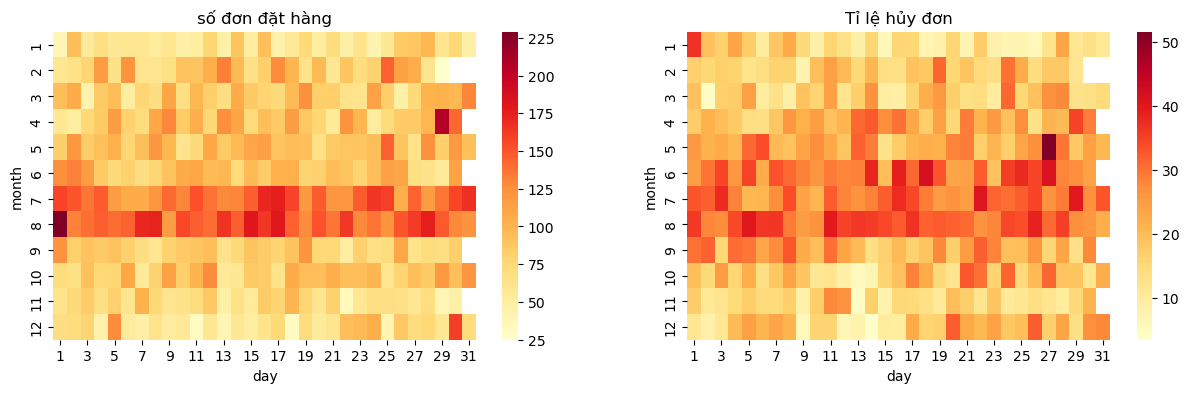

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# heat map thể hiện số đơn đặt hàng theo từng ngày trong từng tháng của biến arrival_date
sns.heatmap(num_order_by_day_and_month, cmap="YlOrRd", cbar=True, ax=axes[0])
axes[0].set_title("số đơn đặt hàng")

# heat map thể hiện tỉ lệ số đơn đặt hàng bị hủy theo từng ngày trong từng tháng của biến arrival_date
sns.heatmap(
    percent_canceled_order_by_day_and_month, cmap="YlOrRd", cbar=True, ax=axes[1]
)
axes[1].set_title("Tỉ lệ hủy đơn")

plt.show()


Thời điểm tháng 8 và tháng 7 khách hàng ưa đến nhất và cũng là thời điểm tỉ lệ hủy đơn nhìn chung cao hơn với các tháng khác

Ý nghĩa: Thời điểm thích hợp để đến khách sạn nên cân nhắc tránh tháng 8 và tháng 7 vì đó là thời điểm khách sạn khá đông khách nên chất lượng có thể bị giảm đi nhiều so với khi ít khách
